✅ Cleaned data sample:
                                         Product Name         ProductID  \
0  MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...  COMGZW35W3DSJADN   
1  MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...  COMGZW37ZX66DBHF   
2  DELL Inspiron 3520 Intel Core i3 12th Gen 1215...  COMGJ75HJGFDJ6JN   
3  Acer One (2024) Intel Core i3 11th Gen 1115G4 ...  COMGPF5CQ7VDWDT4   
4  Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...  COMGPYKZAWY8UX6C   

   Product image  Actual price  Discount price  Stars  Rating  Reviews  \
0            NaN       89990.0         54990.0    3.9     NaN      NaN   
1            NaN       83990.0         67990.0    NaN     NaN      NaN   
2            NaN       49240.0         35660.0    4.2     NaN      NaN   
3            NaN       43999.0         26990.0    4.2     NaN      NaN   
4            NaN       59400.0         27989.0    4.2     NaN      NaN   

                                         Description  \
0  Intel Core i5 Processor (12

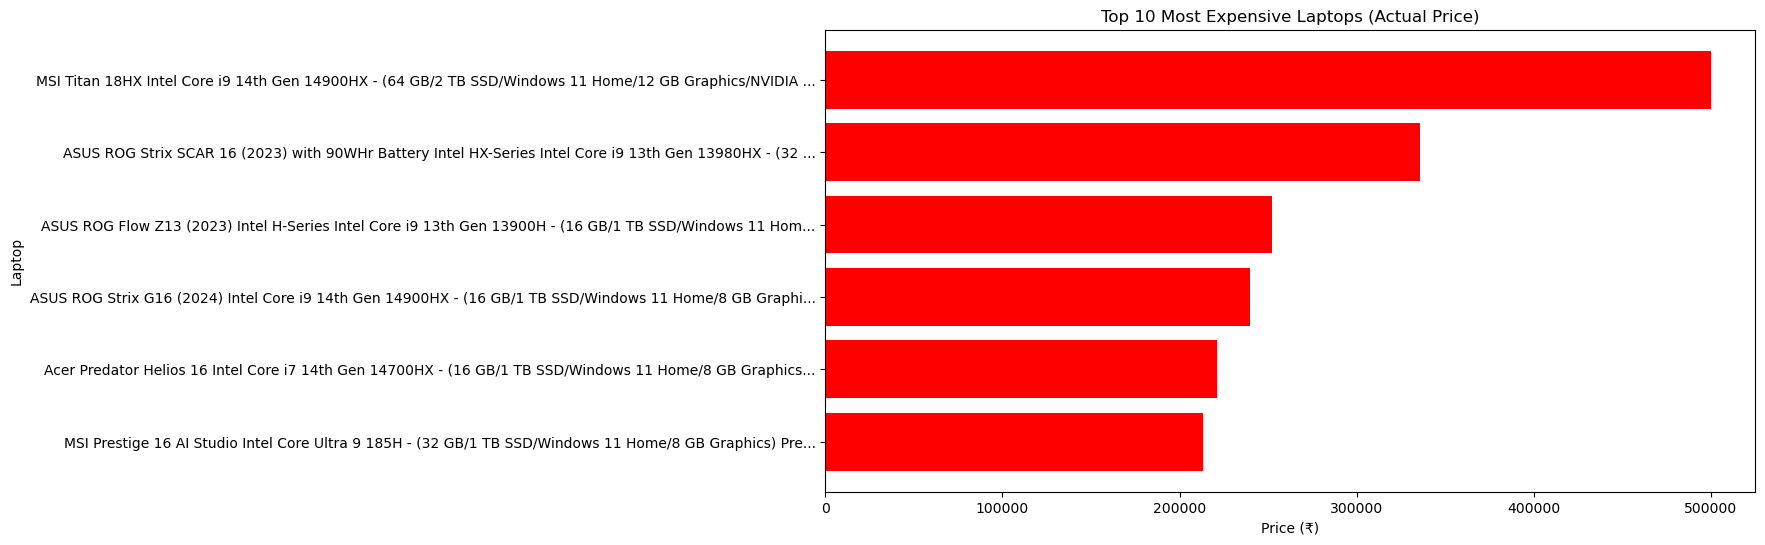

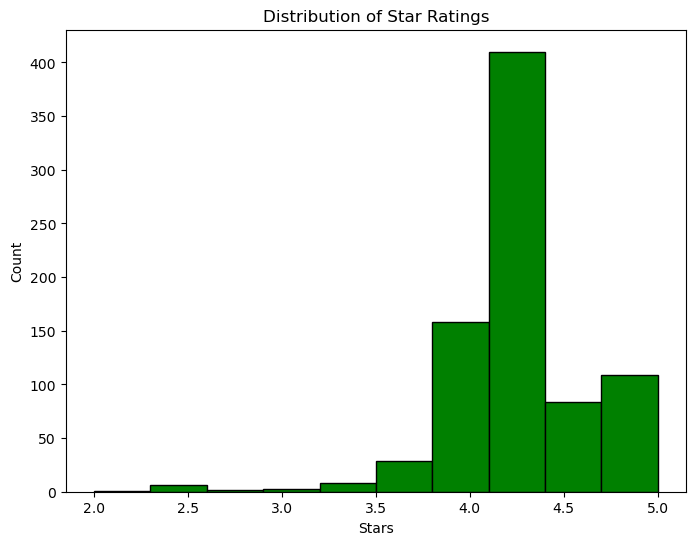

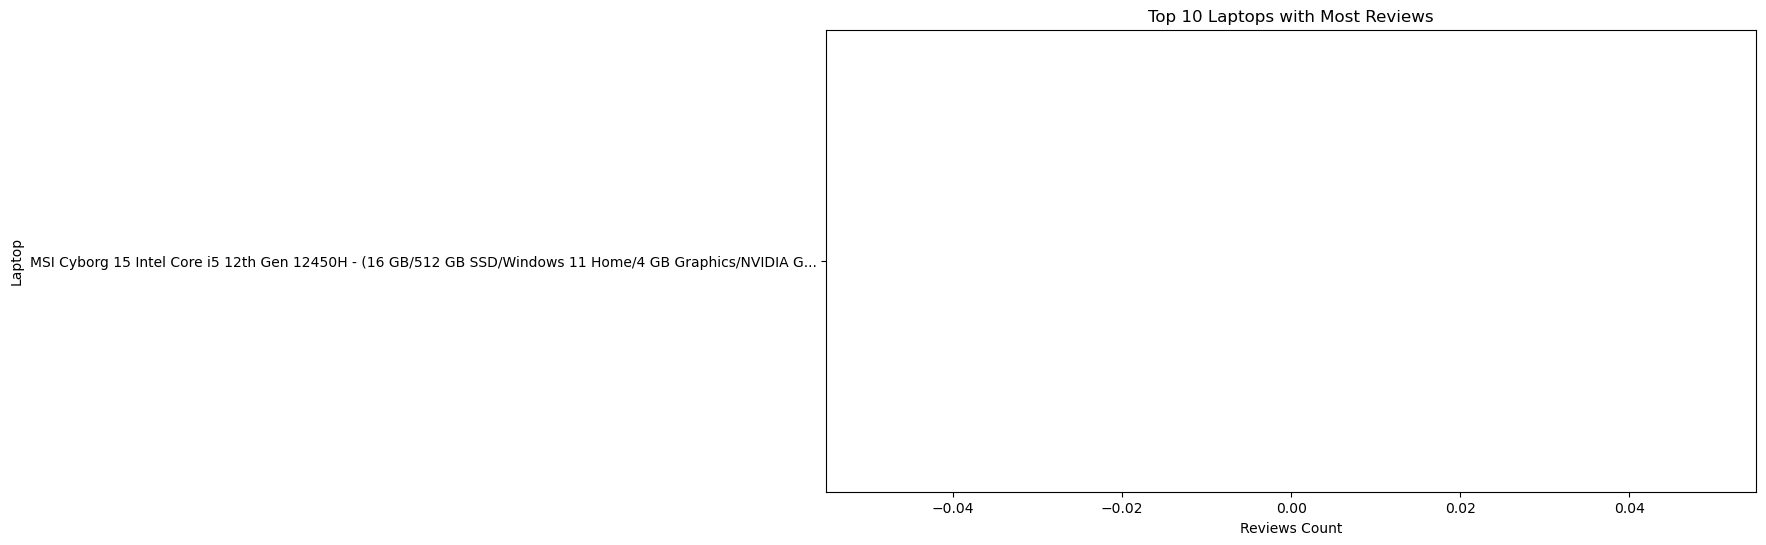

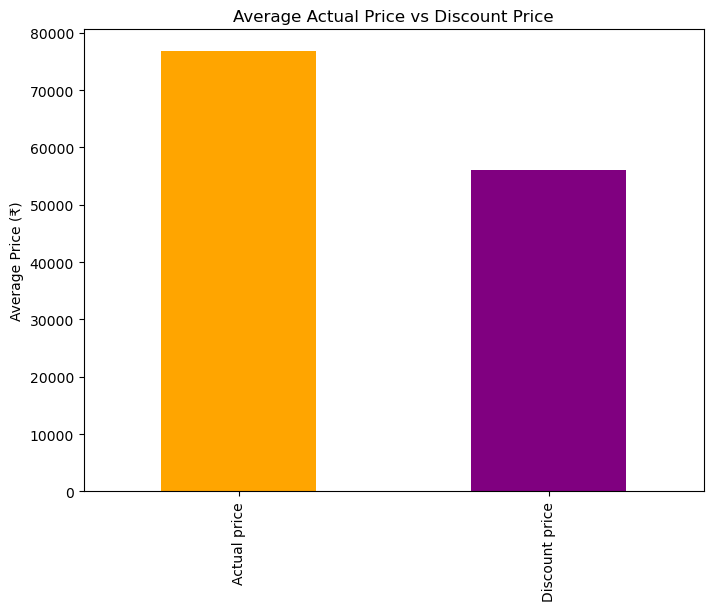

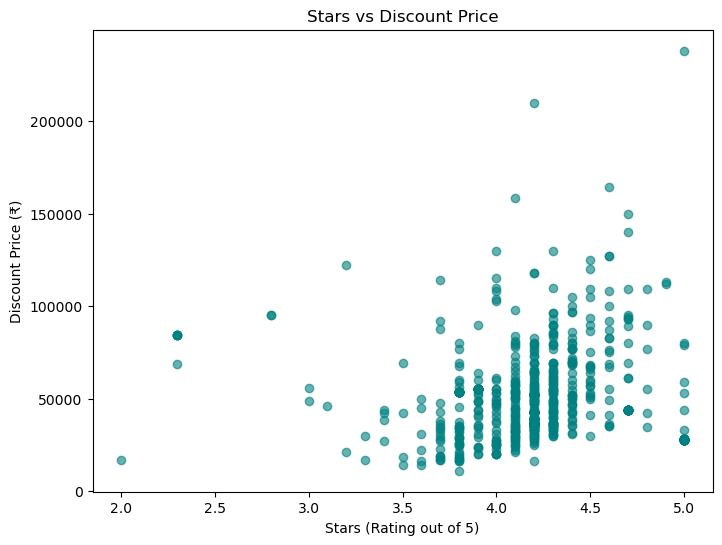

✅ Analysis Completed


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Flipkart-Laptops.xlsx"  
df = pd.read_excel(file_path)

# -------------------------
# Data Cleaning
# -------------------------
# Convert Actual price and Discount price to numeric
for col in ["Actual price", "Discount price"]:
    df[col] = (
        df[col].astype(str)
        .str.replace("₹", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Clean Ratings & Reviews
for col in ["Rating", "Reviews"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Clean Stars
if "Stars" in df.columns:
    df["Stars"] = pd.to_numeric(df["Stars"], errors="coerce")

print("✅ Cleaned data sample:\n", df.head(), "\n")

# -------------------------
# Visualizations
# -------------------------

# (a) Top 10 Most Expensive Laptops (by Actual Price)
top_expensive = df.nlargest(10, "Actual price")[["Product Name", "Actual price"]]
plt.figure(figsize=(12, 6))
plt.barh(top_expensive["Product Name"].astype(str), top_expensive["Actual price"], color="red")
plt.xlabel("Price (₹)")
plt.ylabel("Laptop")
plt.title("Top 10 Most Expensive Laptops (Actual Price)")
plt.gca().invert_yaxis()
plt.show()

# (b) Distribution of Star Ratings
plt.figure(figsize=(8, 6))
plt.hist(df["Stars"].dropna(), bins=10, color="green", edgecolor="black")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings")
plt.show()

# (c) Top 10 Laptops with Most Reviews
top_reviews = df.nlargest(10, "Reviews")[["Product Name", "Reviews"]]
plt.figure(figsize=(12, 6))
plt.barh(top_reviews["Product Name"].astype(str), top_reviews["Reviews"], color="blue")
plt.xlabel("Reviews Count")
plt.ylabel("Laptop")
plt.title("Top 10 Laptops with Most Reviews")
plt.gca().invert_yaxis()
plt.show()

# (d) Price Comparison: Actual vs Discount Price (average)
avg_prices = df[["Actual price", "Discount price"]].mean()
plt.figure(figsize=(8, 6))
avg_prices.plot(kind="bar", color=["orange", "purple"])
plt.ylabel("Average Price (₹)")
plt.title("Average Actual Price vs Discount Price")
plt.show()

# (e) Correlation between Stars and Discount Price
plt.figure(figsize=(8, 6))
plt.scatter(df["Stars"], df["Discount price"], alpha=0.6, color="teal")
plt.xlabel("Stars (Rating out of 5)")
plt.ylabel("Discount Price (₹)")
plt.title("Stars vs Discount Price")
plt.show()

print("✅ Analysis Completed")
